In [31]:
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#loading a built-in dataset with Seaborn
tips=sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distribution Plots

Plots that show the times one thing happens or its distribution and its relation with another attribute

<b>Simple distribution plot</b>

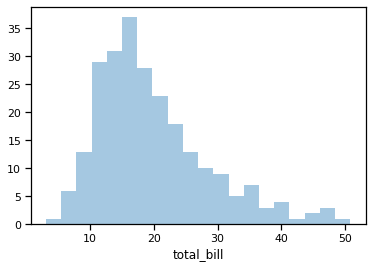

In [7]:
 sns.distplot(tips['total_bill'],kde=False,bins=20)
    #first arg is the column on which distribution is to be made
    #kde kernel density estimate means estimates probability in a linear way.
    #bins are the number of classes the data has to be divided into

<b>JointPlot</b>

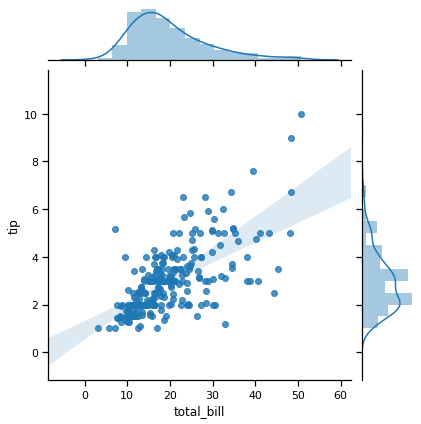

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

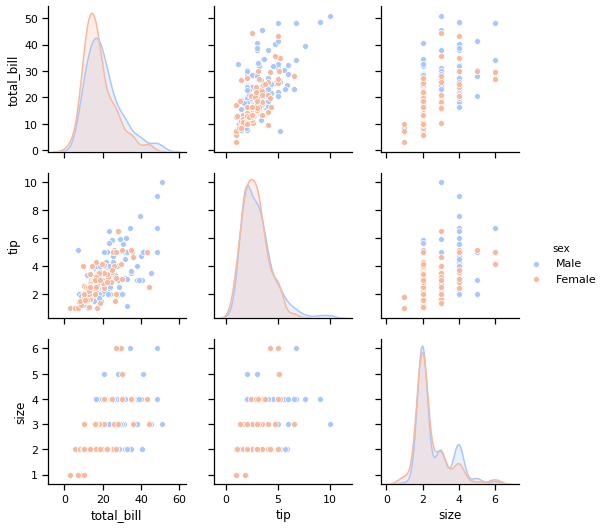

In [9]:
sns.pairplot(tips,hue='sex',palette='coolwarm')
#hue should be categorical variable from data 
#palette is color scheme

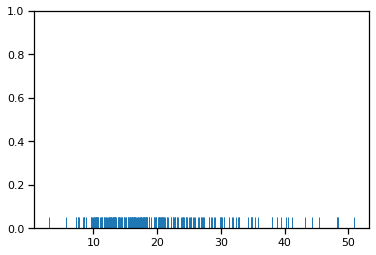

In [10]:
sns.rugplot(tips['total_bill'])

## Categorical Plots

Distribution of categorical attributes (like sex) over numerical attributes 

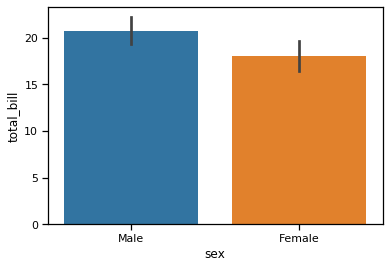

In [11]:
sns.barplot(x='sex',y='total_bill',data=tips )

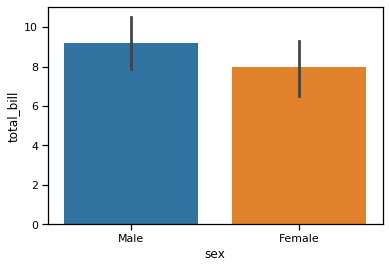

In [12]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std )
#estimator tells how to aggregate the data , std is standard deviation

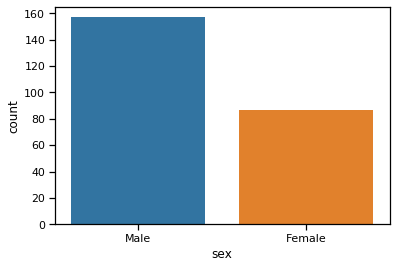

In [13]:
sns.countplot(x='sex',data=tips)
#counts the number of occurances in dataset

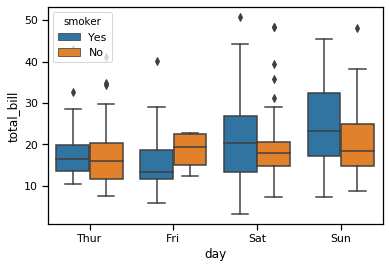

In [14]:
  sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

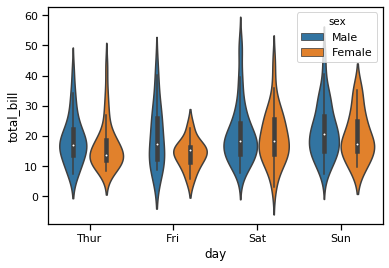

In [15]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')

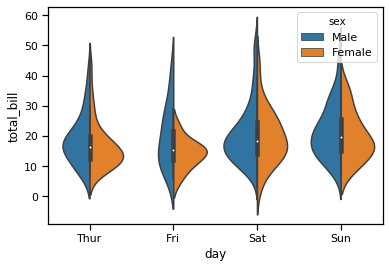

In [16]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

## Matrix Plots

<b> Heat Map</b><br>
used for showing corelation

In [17]:
tc=tips.corr()
tc
#correlation matrix is generated

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


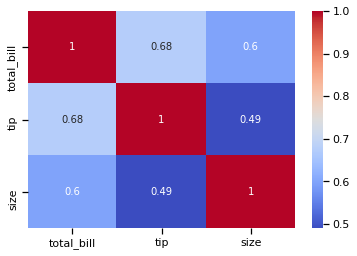

In [18]:
sns.heatmap(tc,annot=True,cmap='coolwarm')
#heat need arg to be a correlation matrix

Matrix can be of any form. <br>
Pivot table is also a kind of matrix

In [19]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Lets generate a pivot table for the above data using <code>.pivot_table</code>

In [20]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


Lets pass the above created matrix / table to a heatmap

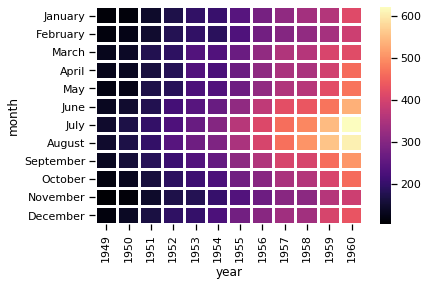

In [21]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=2)

<b>Clustermap</b> shows the simlarities between columns and rows<br>
we can normalise it by passing optional argument , standard_scale=1

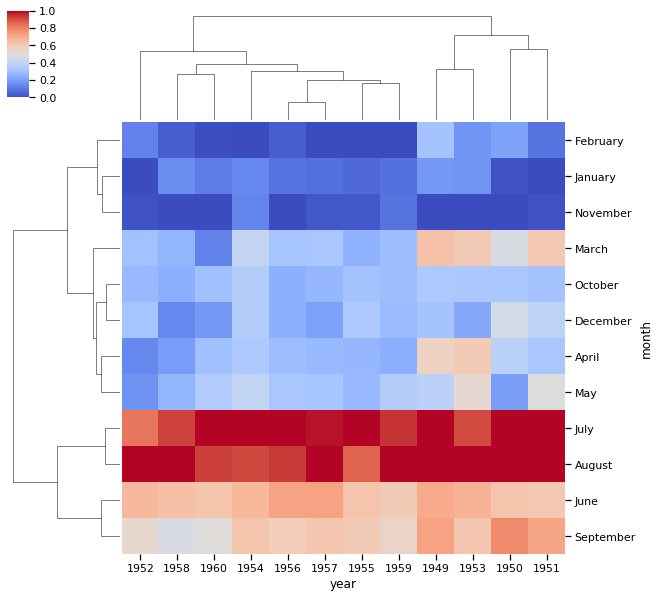

In [22]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

## Grids

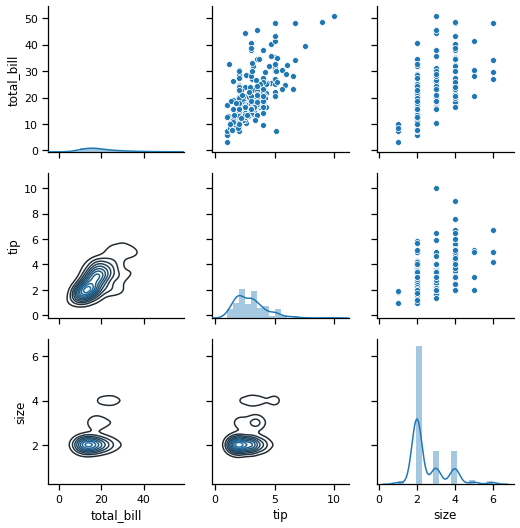

In [23]:
g= sns.PairGrid(tips)
#creates an empty grid in which we can specify plot types
g.map_diag(sns.distplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)


Facet grid is used to divide into actegories and show as per it<br>
here rows are smoker (yes or no) and columns are time (lunch,dinner) and values are total_bill<br>
hence for first graph it plots data where smoker = yes and time = lunch

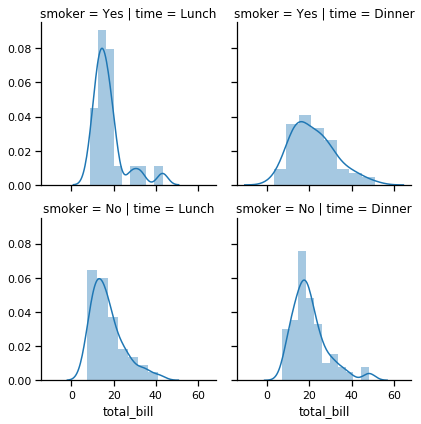

In [24]:
g=sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

## Regression Plots


lmplot stands for linear model regression plot. It creates 

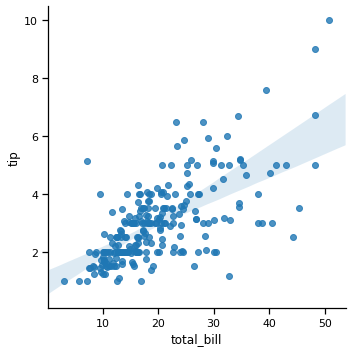

In [25]:
sns.lmplot(x='total_bill',y='tip',data=tips)

Hue vs Rows and columns
hue just color codes the grap whereas grids or col and row arguments make different graphs for each condition

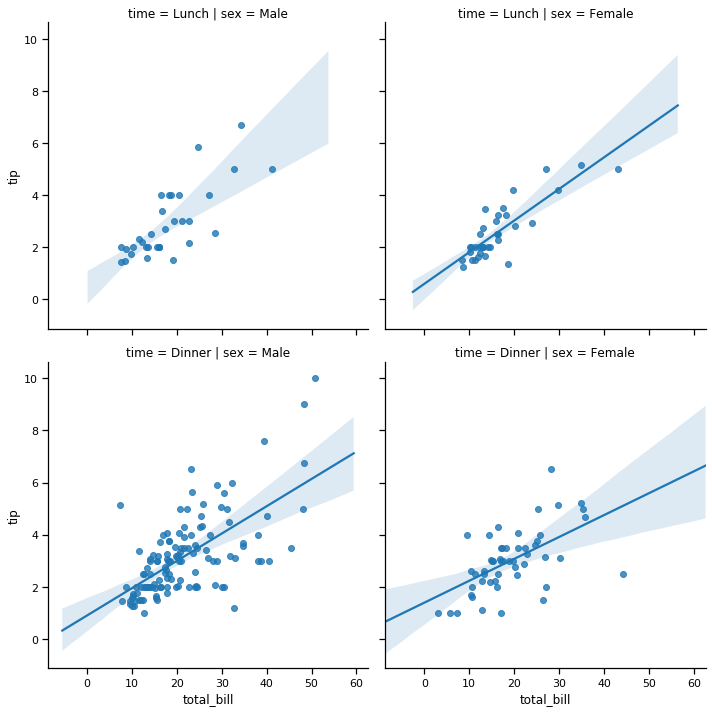

In [26]:
sns.lmplot(x='total_bill',y='tip',data=tips,row='time',col='sex')

## Styling and Coloring

Style can be set using <code>.set_style</code><br>
Note:Style once set cannot be removed unless another style is passed

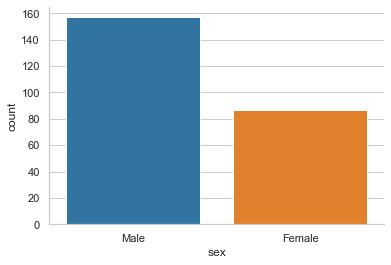

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)
sns.despine()
#despine remove right and bottom border , we can pass 
#additional arguments in it to remove from left too



As Seaborn is based on matplotlib we can pass argments to matplotlib functions and still see effect on seaborn :

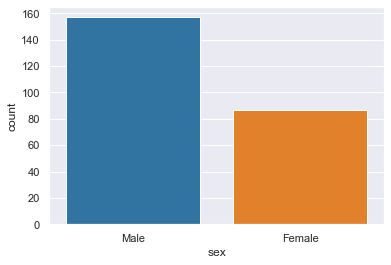

In [28]:
sns.set_style('darkgrid')
#plt.figure(figsize=(5,3))
#the above won't work until import matplotlib.pyplot as plt is run 
#instead of import matplotlib as plt
#sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(x='sex', data=tips )

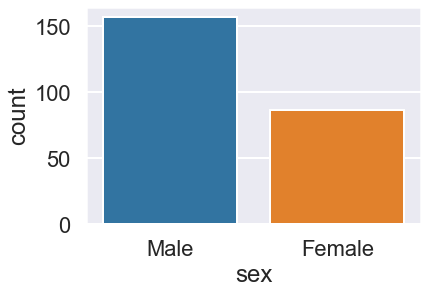

In [29]:
sns.set_context('poster',font_scale=1)
sns.countplot(x='sex', data=tips )

(0, 100)

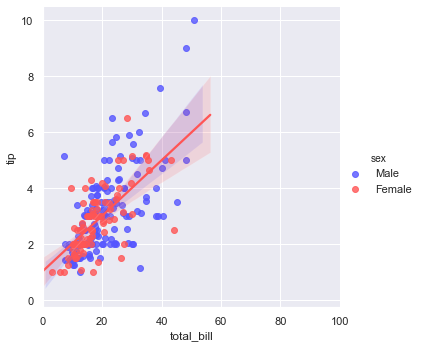

In [33]:
sns.set_context('notebook')
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')
plt.xlim([0,100])
#plt.xlim sets the x-axis limits